In [79]:
from sklearn.datasets import fetch_openml

In [80]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense

In [81]:
import pandas as pd
import numpy as np

In [82]:
mnist = fetch_openml("mnist_784", version=1, parser='auto')

In [83]:
#mnist

In [84]:
x,y = mnist['data'], mnist['target']

In [85]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
x.shape

(70000, 784)

In [87]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
x = x.to_numpy()


In [89]:
%matplotlib inline
import matplotlib.pyplot as plt

In [90]:
some_digit = x[1000]
some_digit_image = some_digit.reshape(28,28)

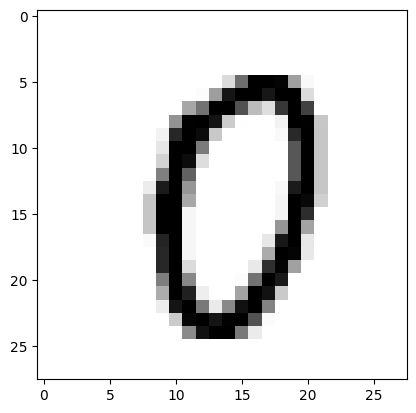

In [91]:

plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation="nearest")
plt.show()


In [92]:
y[1000]

'0'

In [93]:
x_train, x_test = x[:60000],x[60000:]

In [94]:
y_train,y_test = y[:60000], y[60000:]

In [95]:
shuffle_index = np.random.permutation(60000)
x_train,y_train = x_train[shuffle_index], y_train[shuffle_index]

In [96]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [97]:
x_train.shape

(60000, 784)

In [98]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [99]:
x_test.shape,y_test.shape,y_train.shape,x_train.shape

((10000, 784), (10000,), (60000,), (60000, 784))

In [100]:
x_train = x_train/255
x_test = x_test/255
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [101]:
y_test.reset_index(drop=True, inplace=True)

In [102]:
model = Sequential()

In [103]:
# if array is 2-d, then first flatten it , to create first layer


In [115]:
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(128,activation ='relu'))
model.add(Dense(64,activation ='relu'))

model.add(Dense(10,activation='softmax'))

In [116]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 dense_11 (Dense)            (None, 128)               16512     
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 dense_13 (Dense)            (None, 10)                1290      
                                                                 
 dense_14 (Dense)            (None, 64)                704       
                                                                 
 dense_15 (Dense)            (None, 128)              

In [117]:
model.compile(optimizer='Adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [118]:
history = model.fit(x_train,y_train,batch_size=64,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
750/750 [==============================] - 6s 6ms/step - loss: 0.6232 - accuracy: 0.7918 - val_loss: 0.2201 - val_accuracy: 0.9427
Epoch 2/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1675 - accuracy: 0.9541 - val_loss: 0.1524 - val_accuracy: 0.9596
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.1243 - accuracy: 0.9658 - val_loss: 0.1417 - val_accuracy: 0.9632
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1021 - accuracy: 0.9714 - val_loss: 0.1264 - val_accuracy: 0.9648
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0868 - accuracy: 0.9764 - val_loss: 0.1195 - val_accuracy: 0.9698
Epoch 6/20
750/750 [==============================] - 4s 5ms/step - loss: 0.0729 - accuracy: 0.9796 - val_loss: 0.1313 - val_accuracy: 0.9676
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0653 - accuracy: 0.9818 - val_loss: 0.1264 - val_accuracy: 0.9671
Epoch 

In [119]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1466 - accuracy: 0.9688


[0.1466156393289566, 0.9688000082969666]

In [120]:
model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


array([[4.93561799e-07, 1.91043341e-08, 4.13519138e-06, ...,
        9.99886572e-01, 3.69057290e-07, 2.83269947e-06],
       [3.72797388e-07, 6.11766009e-04, 9.97076571e-01, ...,
        2.23379489e-03, 1.64802241e-05, 2.56427288e-08],
       [8.25816152e-12, 9.99952495e-01, 5.67425923e-06, ...,
        3.14785830e-05, 3.74694878e-06, 3.96402385e-07],
       ...,
       [1.01599483e-07, 2.44103688e-07, 8.12390965e-07, ...,
        1.04574722e-08, 4.60541713e-07, 3.70347843e-04],
       [2.25961131e-07, 1.33987034e-14, 4.39889292e-10, ...,
        4.99850216e-07, 7.43558921e-05, 3.56376489e-07],
       [1.57323040e-04, 6.60914736e-08, 5.69409785e-05, ...,
        7.87691548e-08, 2.36392021e-04, 2.08762970e-07]], dtype=float32)

In [121]:
# Assuming you have a trained model named 'model'
# and test data 'x_test'

# Get predicted probabilities for each class
predicted_probs = model.predict(x_test)

# Determine the predicted class for each sample
predicted_classes = predicted_probs.argmax(axis=1)

# Now 'predicted_classes' contains the predicted class labels
# for each test sample


313/313 [==============================] - 1s 2ms/step


In [122]:
predicted_classes.shape


(10000,)

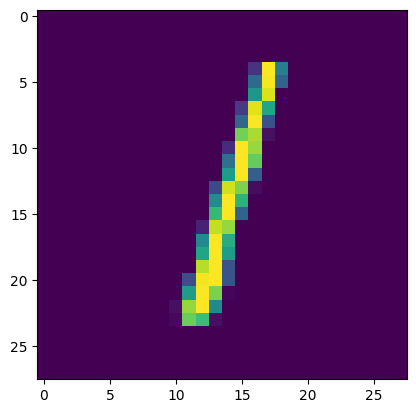

In [123]:
x_reshaped = x_test[2]
image = x_reshaped.reshape(28,28)
plt.imshow(image)

In [124]:
y_test[2]

1

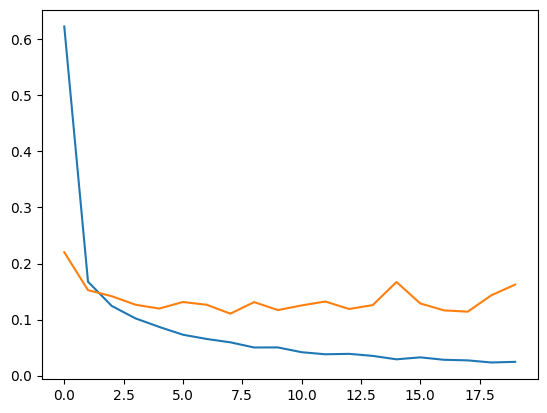

In [125]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

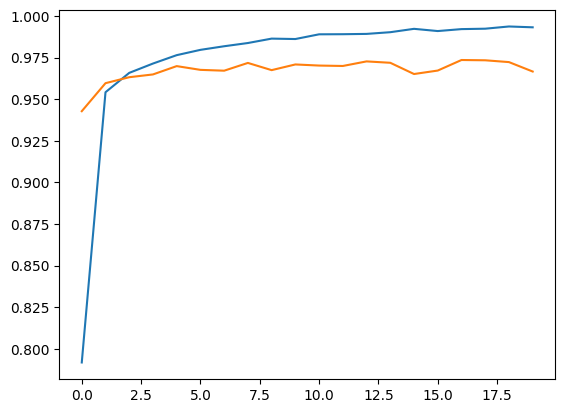

In [126]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# New Section